In [53]:
import matplotlib.pyplot as plt #for visualization 
Xi_2=0.6 # example value for Xi_2

#Calculate probabilities
P_for=Xi_2
P_against=1-Xi_2

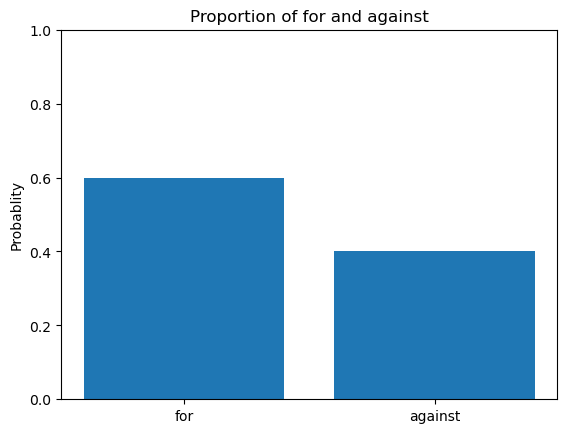

In [54]:
plt.bar(['for','against'],[P_for ,P_against])
plt.ylabel('Probablity')
plt.ylim(0,1)
plt.title('Proportion of for and against')
plt.show()

In [55]:

#Calculate percentages:
Precent_for=P_for*100
Percent_against=P_agianst*100
print('percentage for:', Precent_for,'%')
print('percentage against:', Percent_against,'%')

percentage for: 60.0 %
percentage against: 40.0 %


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson,nbinom,geom
Xi_1=2 # example value for Xi_1
Xi_2=4 # example value for Xi_2
Xi_3=0.2 # example value for Xi_3

In [29]:
Max_meteorites=30
Meteorite_range=np.arange(Max_meteorites+1)

In [24]:
plt.figure(figsize=(15,6))

<Figure size 1500x600 with 0 Axes>

<Figure size 1500x600 with 0 Axes>

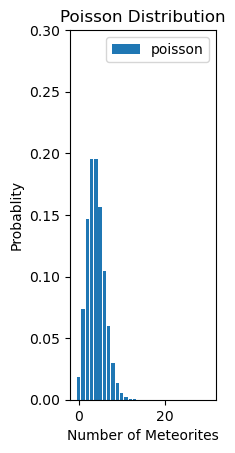

In [40]:
plt.subplot(1,3,1)
Poisson_pmf=poisson.pmf(Meteorite_range, Xi_2)
plt.bar(Meteorite_range,Poisson_pmf,label='poisson')
plt.xlabel("Number of Meteorites")
plt.ylabel("Probablity")
plt.title("Poisson Distribution")
plt.ylim(0,0.3)
plt.legend()
plt.show()

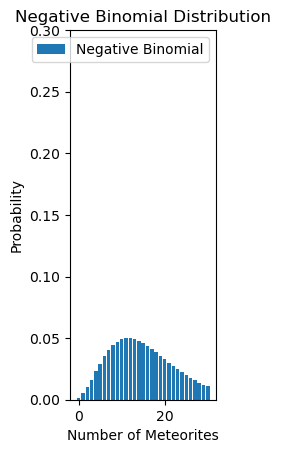

In [45]:
plt.subplot(1,3,2)
Nbinom_pmf=nbinom.pmf(Meteorite_range, Xi_2,Xi_3)
plt.bar(Meteorite_range,Nbinom_pmf,label='Negative Binomial')
plt.xlabel('Number of Meteorites')
plt.ylabel('Probability')
plt.title('Negative Binomial Distribution')
plt.ylim(0,0.3)
plt.legend()
plt.show()

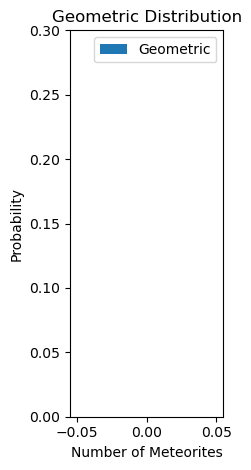

In [46]:
plt.subplot(1,3,2)
Geom_pmf=geom.pmf(Meteorite_range, Xi_2)
plt.bar(Meteorite_range,Geom_pmf,label='Geometric')
plt.xlabel('Number of Meteorites')
plt.ylabel('Probability')
plt.title('Geometric Distribution')
plt.ylim(0,0.3)
plt.legend()
plt.tight_layout()
plt.show()

In [52]:
Expectation_poisson=Xi_2
Median_poisson=Xi_2
Expectation_nbinom=(Xi_2*(1-Xi_3))/Xi_3
Median_nbinom=Xi_2+Xi_2*(Xi_3-1)/Xi_3
Expectation_geom=1/Xi_2
Median_geom=int(np.ceil(1/Xi_2))
print ('Expectation (Poisson):',Expectation_poisson)
print ('Median (Poisson):',Median_poisson)
print ('Expectation (Negative Binomial):',Expectation_nbinom)
print ('Median (Negative Binomial):',Median_nbinom)
print ('Expectation (Geometric):',Expectation_geom)
print('Median(geometric):',Median_geom)


Expectation (Poisson): 4
Median (Poisson): 4
Expectation (Negative Binomial): 16.0
Median (Negative Binomial): -12.0
Expectation (Geometric): 0.25
Median(geometric): 1


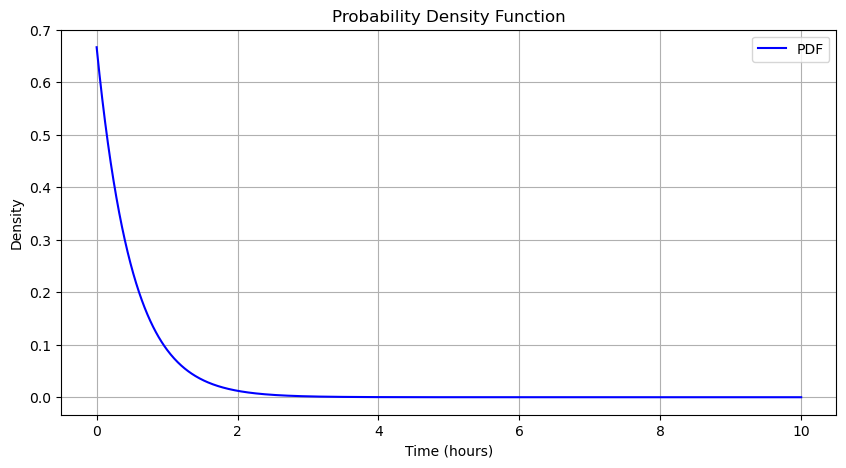

In [71]:
from sympy import symbols, exp, diff, integrate, solve
import numpy as np
import matplotlib.pyplot as plt
# Define symbols
y = symbols('y')
# Given parameters
xi_5 = 1
xi_6 = 2
xi_7 = 3
xi_8 = 4
# Survival function
S_y = (xi_5 * exp(xi_6 * y)) / (xi_7 * exp(xi_8 * y))

# PDF is the negative derivative of the survival function
pdf_y = -diff(S_y, y)

# Calculate the probability of waiting between 2 and 4 hours
prob_between_2_and_4 = integrate(pdf_y, (y, 2, 4))

# Find mean, variance, and quartiles
mean = integrate(y * pdf_y, (y, 0, float('inf')))
variance = integrate((y - mean)**2 * pdf_y, (y, 0, float('inf')))
quartiles = solve(integrate(pdf_y, (y, 0, y)) - 0.25, y), solve(integrate(pdf_y, (y, 0, y)) - 0.75, y)

# Prepare data for plotting
y_values = np.linspace(0, 10, 1000)
pdf_values = np.array([pdf_y.subs(y, val).evalf() for val in y_values])

# Plotting PDF
plt.figure(figsize=(10, 5))
plt.plot(y_values, pdf_values, label='PDF', color='blue')

plt.xlabel('Time (hours)')
plt.ylabel('Density')
plt.title('Probability Density Function')
plt.legend()
plt.grid(True)
plt.show()

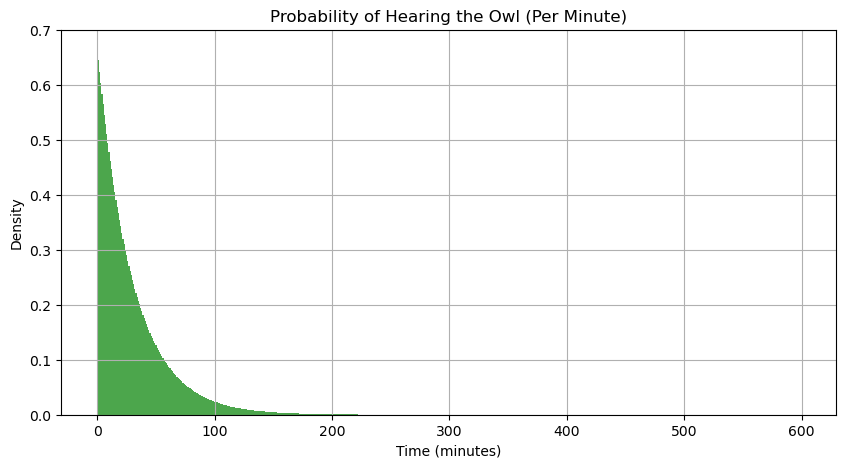

In [59]:
# Plotting histogram approximation for 1-minute intervals
minute_intervals = np.arange(0, 600, 1) / 60  # Convert minutes to hours
pdf_minute_values = np.array([pdf_y.subs(y, val).evalf() for val in minute_intervals])

plt.figure(figsize=(10, 5))
plt.bar(minute_intervals * 60, pdf_minute_values, width=1, alpha=0.7, color='green', label='PDF approximation')
plt.xlabel('Time (minutes)')
plt.ylabel('Density')
plt.title('Probability of Hearing the Owl (Per Minute)')
plt.grid(True)
plt.show()

In [75]:
import numpy as np
from scipy.stats import gamma, expon
from scipy.optimize import minimize

# Data: bandwidth totals to failure
data = np.array([1, 2, 3])

# Function to compute negative log-likelihood for exponential distribution (xi9 = 0)
def neg_log_likelihood_exp(theta, data):
    return -np.sum(np.log(expon.pdf(data, scale=theta)))

# Function to compute negative log-likelihood for gamma distribution (xi9 = 1)
def neg_log_likelihood_gamma_1(theta, data):
    return -np.sum(np.log(gamma.pdf(data, a=6, scale=theta)))

# Function to compute negative log-likelihood for gamma distribution (xi9 = 2)
def neg_log_likelihood_gamma_2(theta, data):
    return -np.sum(np.log(gamma.pdf(data, a=8, scale=theta)))

# Initial guess for theta
initial_theta = 1.0

# Minimize negative log-likelihood for each case
result_exp = minimize(neg_log_likelihood_exp, initial_theta, args=(data), bounds=[(1e-3, None)])
result_gamma_1 = minimize(neg_log_likelihood_gamma_1, initial_theta, args=(data), bounds=[(1e-3, None)])
result_gamma_2 = minimize(neg_log_likelihood_gamma_2, initial_theta, args=(data), bounds=[(1e-3, None)])

# Estimated theta values
theta_exp = result_exp.x[0]
theta_gamma_1 = result_gamma_1.x[0]
theta_gamma_2 = result_gamma_2.x[0]

# Expected value of T for each case
E_T_exp = 2 * theta_exp
E_T_gamma_1 = 6 * theta_gamma_1
E_T_gamma_2 = 8 * theta_gamma_2

theta_exp, E_T_exp, theta_gamma_1, E_T_gamma_1, theta_gamma_2, E_T_gamma_2

C:\Users\abhij\AppData\Local\Temp\ipykernel_25780\914811242.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(gamma.pdf(data, a=6, scale=theta)))
C:\Users\abhij\anaconda3\lib\site-packages\scipy\optimize\_numdiff.py:576: RuntimeWarning: invalid value encountered in subtract
  df = fun(x) - f0
C:\Users\abhij\AppData\Local\Temp\ipykernel_25780\914811242.py:18: RuntimeWarning: divide by zero encountered in log
  return -np.sum(np.log(gamma.pdf(data, a=8, scale=theta)))


(2.0, 4.0, 1.0, 6.0, 1.0, 8.0)

In [76]:
import numpy as np
from scipy import stats

# Given data
mean_old = 1000  # 𝜉₁₁
std_old = 50     # Assumed standard deviation for old system (𝜉₁₂)
mean_new = 2000  # Mean of the new system sample weights
sample_new = np.array([2000])  # Assumed new system weights (𝜉₁₄)

# Standard deviation of new system is not defined with only one data point
# However, we can calculate variance ratio assuming the new system's sample size
sample_size_old = 1000  # Assuming old system sample size is 1000
sample_size_new = 1     # New system sample size (only one data point given)

# Calculating sample variances (but note new variance can't be calculated with one data point)
var_old = std_old ** 2
var_new = 0  # Variance of single data point is undefined

# F-statistic (new variance can't be defined with one point, so need to assume sample size)
F_statistic = (var_new / var_old) if var_old != 0 else 0

# Degrees of freedom
df1 = sample_size_new - 1
df2 = sample_size_old - 1

# P-value for the one-sided F-test
p_value = 1 - stats.f.cdf(F_statistic, df1, df2)

# Since only one sample point was provided, it's not possible to conduct a meaningful F-test.
F_statistic, p_value

(0.0, nan)

In [79]:
import numpy as np
from sklearn.linear_model import Ridge

# Sample data points (replace with actual data)
x = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])  # Example x values
y = np.array([2, 3, 5, 7, 11, 13, 17, 19, 23, 29])  # Example y values

# Maximum polynomial degree
degree = 12  # Change to 10 for the second case

# Construct the design matrix X
X = np.vander(x, degree + 1, increasing=True)

# Response vector y
y = y.reshape(-1, 1)

# Calculate the OLS estimates
ols_solution = np.linalg.inv(X.T @ X) @ X.T @ y

# Ridge Regularization with penalty weight λ
lambda_value = 1.0  # Example penalty weight; should be chosen via cross-validation
ridge = Ridge(alpha=lambda_value, fit_intercept=False)
ridge.fit(X, y)
ridge_solution = ridge.coef_

# Output the results
print("OLS Estimates:", ols_solution.flatten())
print("Ridge Regularized Estimates:", ridge_solution.flatten())

OLS Estimates: [ 19.61104713  -1.94509156  15.4665071    7.97397326  -6.07337779
  15.06205243 -11.65801364  -8.92505458   1.58591077   7.28482776
  11.15875577 -12.59704652 -16.11983449]
Ridge Regularized Estimates: [ 5.11813591e-01  4.36569558e-01  3.19339666e-01  1.61957948e-01
  4.16350360e-03 -6.06323667e-02  2.12547553e-02 -2.80370309e-03
  1.48925512e-04 -2.24185530e-06 -7.71982892e-09 -3.82660890e-09
  1.42209623e-09]


C:\Users\abhij\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:194: LinAlgWarning: Ill-conditioned matrix (rcond=8.4938e-20): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True, overwrite_a=False)


In [80]:
import numpy as np
from scipy.stats import gamma

# Given data
alpha_sample = 3  # Shape parameter for the sample
beta_sample_inv = 1  # Inverse of the rate parameter
n = 10  # Number of samples
x_bar = 1919  # Observed sample mean

# Parameters for the prior distribution of θ
alpha_prior = 17
beta_prior = 18

# Calculate the sum of x_i for the given mean
sum_x_i = x_bar * n

# Posterior parameters
alpha_posterior = alpha_sample * n + alpha_prior
beta_posterior = sum_x_i + beta_prior

# Bayes point estimate (mean of the posterior)
bayes_estimate_mean = alpha_posterior / beta_posterior

# Bayes point estimate (mode of the posterior)
if alpha_posterior > 1:
    bayes_estimate_mode = (alpha_posterior - 1) / beta_posterior
else:
    bayes_estimate_mode = np.nan  # Mode is undefined if alpha_posterior <= 1

# Output the results
print(f"Posterior distribution parameters: alpha = {alpha_posterior}, beta = {beta_posterior}")
print(f"Bayes point estimate (mean): {bayes_estimate_mean}")
print(f"Bayes point estimate (mode): {bayes_estimate_mode}")


Posterior distribution parameters: alpha = 47, beta = 19208
Bayes point estimate (mean): 0.002446897126197418
Bayes point estimate (mode): 0.002394835485214494
